<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_16_Emotion_Mining_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup as bs
import nltk
import os

In [2]:
#Extracting the review
apple_reviews = []
for i in range(1,30):
    apple = []
    url = 'https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)'+str(i)
response = requests.get(url)
soup=bs(response.content, 'html.parser')
reviews=soup.find_all("span", {"data-hook":"review-body"})
for i in range(len(reviews)):
    apple.append(reviews[i].text)
    apple_reviews = apple_reviews+apple

In [3]:
#Saving the extracted data
with open ('apple.txt', "w", encoding='utf8') as output:
    output.write(str(apple_reviews))

In [4]:
#Joining all the reviews into a single paragraph
apple_rev_str = ' '.join(apple_reviews)
apple_rev_str

'\nIt\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nIt\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nWe buy macbook\'s expecting that it will lasts at least 3 years, not in my case they are saying it will costs 46000rs to repair.. i bought this in 58000rs.. if i don\'t want to repair it still I\'ve to pay 2500rs as diagnostic cost.. not recommended..\n \nIt\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nWe buy macbook\'s expecting that it will lasts at least 3 years, not in my case they are saying it will costs 46000rs to repair.. i bought this in 58000rs.. if i don\'t want to repair it still I\'ve to pay 2500rs as diagnostic cost.. not recommended..\n \nBest Laptop under 60k. If you don\'t want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it\'s battery life with sleek look 😍Now talking about 

In [5]:
#Removing unwanted symbols
apple_rev_str = re.sub("[^A-Za-z" "]+"," ",apple_rev_str).lower()
apple_rev_str = re.sub("[0-9" "]+"," ", apple_rev_str)

In [6]:
#Splitting the words into individual strings
apple_reviews_words = apple_rev_str.split(" ")

In [8]:
#Removing the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
apple_reviews_words = [w for w in apple_reviews_words if not w in stop_words]

In [15]:
apple_rev_str = ' '.join(apple_reviews_words) 

In [20]:
with open("stop.txt", "r") as sw:
    stopwords = sw.read()

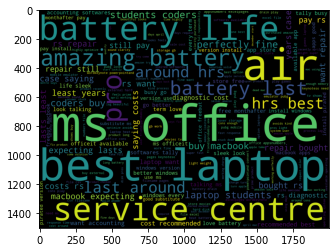

In [16]:
#Creating the wordcloud
from wordcloud import WordCloud
wordcloud_stop=WordCloud(background_color="black", width=2000, height=1500).generate(apple_rev_str)
plt.imshow(wordcloud_stop)

In [21]:
#Extracting the positive words from wordcloud
with open("positive-words.txt") as pos:
    positive_words=pos.read().split('\n')
    positive_words=positive_words[36:]

In [22]:
apple_positive = " ".join([w for w in apple_reviews_words if w in positive_words])

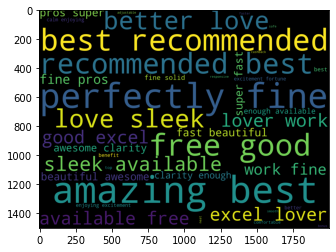

In [23]:
#Positive wordcloud
wordcloud_positive=WordCloud(background_color="black", width=2000, height=1500).generate(apple_positive)
plt.imshow(wordcloud_positive)

In [24]:
#Extracting the negative words from wordcloud
with open("negative-words.txt",encoding = "ISO-8859-1") as neg:
    negative_words=neg.read().split("\n")
    negative_words=negative_words[37:]

In [25]:
apple_negative = " ".join([w for w in apple_reviews_words if w in negative_words])

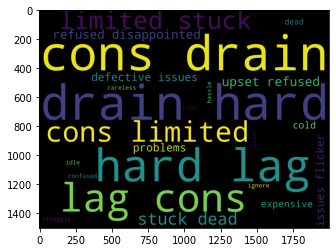

In [26]:
#Negative wordcloud
wordcloud_negative=WordCloud(background_color="black",width=2000,height=1500).generate(apple_negative)
plt.imshow(wordcloud_negative)

In [27]:
##Unique words
apple_unique = list(set(" ".join(apple_reviews).split(" ")))

In [28]:
apple_unique

['',
 'app',
 'cost..',
 'not',
 'security',
 'reading!',
 'usage#',
 'Performance',
 'solid',
 'with',
 'need,',
 '.in/24\n',
 'laptop#',
 'it',
 'Programming,',
 'benefit',
 'weight',
 'why',
 'Purchased',
 'and',
 'Macbook',
 "can't,",
 'backup',
 '\nBought',
 'Basically',
 'my',
 'Many',
 'freeBut',
 'some',
 '\nNever',
 'Silver,',
 'Intel',
 'Android',
 'fix',
 'here',
 'Slim',
 'spike',
 'came',
 'tests,',
 'really',
 'Get',
 'say',
 'The',
 'due.',
 'comfortable',
 '6',
 '(In',
 'Excel',
 'difference',
 'far',
 'button',
 'sometime.',
 '4',
 'pirated',
 ':\n',
 'Retina',
 'vqr',
 'Photoshop',
 'January',
 'who',
 'cuddling',
 'I',
 'button.',
 'demerits',
 'calls#',
 'struggle',
 'emulator',
 'cannot',
 'people',
 'Color',
 'take',
 'days,',
 'contains',
 '10',
 'months.I',
 'time2.',
 'Mac',
 'dropped',
 '11-12',
 'amazon',
 'lower',
 '(2015).',
 'free',
 'says',
 'speakers',
 'money.\n',
 'machine',
 'two.Thanks',
 'browse',
 'service,',
 'replaced',
 'recently',
 'part,',
 's

Emotion Mining

In [30]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [31]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [34]:
import nltk
nltk.download('punkt')
from nltk import tokenize
apple_unique = tokenize.sent_tokenize(" ".join(apple_reviews))
apple_unique[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


["Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk\n \nIt's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nWe buy macbook's expecting that it will lasts at least 3 years, not in my case they are saying it will costs 46000rs to repair.. i bought this in 58000rs.. if i don't want to repair it still I've to pay 2500rs as diagnostic cost.. not recommended..\n \nBest Laptop under 60k.",
 "If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term.",
 "I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeyno

In [35]:
sent_df = pd.DataFrame(apple_unique, columns=['word'])
sent_df

,word
0,\nIt's amazing..... battery last around 10 -12...
1,It's amazing..... battery last around 10 -12 h...
2,If you don't want any accounting softwares lik...
3,I just love it's battery life with sleek look ...
4,"U cannot play games, your laptop will just hea..."
...,...
248,"But Software like Android studio, Photoshop se..."
249,But if you are once in a while user of intensi...
250,If you have any queries leave a comment below.
251,I will try to answer in a day or two.Thanks fo...


In [36]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [37]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [38]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in apple_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [39]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [40]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [41]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [42]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    73
1    64
2    21
3    94
4    25
5    89
6    21
7    94
8    25
9    26
Name: word_count, dtype: int64

In [43]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
60,It's amazing..... battery last around 10 -12 h...,12,64
33,It's amazing..... battery last around 10 -12 h...,12,64
133,It's amazing..... battery last around 10 -12 h...,12,64
179,It's amazing..... battery last around 10 -12 h...,12,64
1,It's amazing..... battery last around 10 -12 h...,12,64
5,"Storage 128gb, it will work fine but if you wa...",14,89
17,Operating system is not that user-friendlyProb...,15,78
0,\nIt's amazing..... battery last around 10 -12...,16,73
93,Now my mac is perfectly fine :\n \nIt's amazin...,17,71
228,Basically i will be comparing this with a regu...,20,171


In [44]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    253.000000
mean       1.608696
std        3.535680
min       -3.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       20.000000
Name: sentiment_value, dtype: float64

In [45]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
4,"U cannot play games, your laptop will just hea...",0,25
8,"U cannot play games, your laptop will just hea...",0,25
14,Purchased during Amazon sale cost around 52k.C...,0,7
15,Not enough memory2.,0,3
16,Limited softwares available3.,-1,3


# Sentiment score of the whole review

In [51]:
sent_df[sent_df['sentiment_value']>0].head()

,word,sentiment_value,word_count,index
0,\nIt's amazing..... battery last around 10 -12...,16,73,0
1,It's amazing..... battery last around 10 -12 h...,12,64,1
2,If you don't want any accounting softwares lik...,3,21,2
3,I just love it's battery life with sleek look ...,5,94,3
5,"Storage 128gb, it will work fine but if you wa...",14,89,5


In [52]:
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count,index
4,"U cannot play games, your laptop will just hea...",0,25,4
8,"U cannot play games, your laptop will just hea...",0,25,8
14,Purchased during Amazon sale cost around 52k.C...,0,7,14
15,Not enough memory2.,0,3,15
16,Limited softwares available3.,-1,3,16


In [47]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


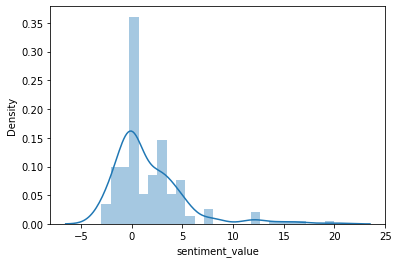

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

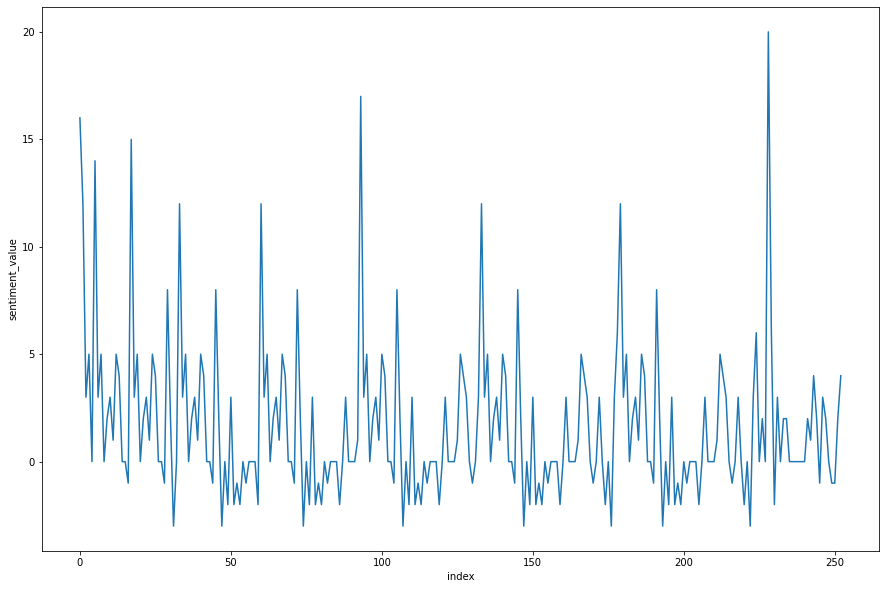

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

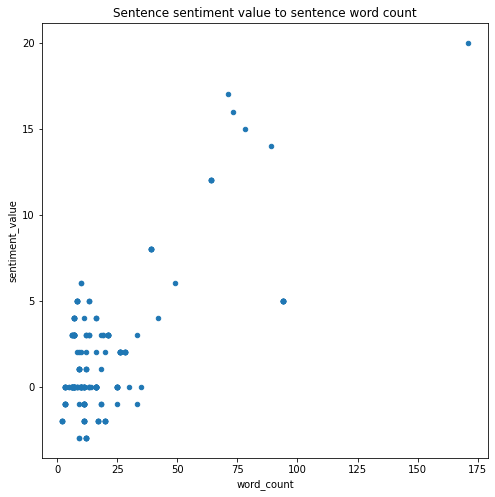

In [55]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')